In [ ]:
# CODSOFT NOVEMBER BATCH 2024
# DATA SCIENCE
# Sehrish Kazmi
# TASK 1: Titanic Survival Prediction
# Build a model that predicts whether a passenger on the Titanic survived or not. 
# The dataset contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

In [312]:
import pandas as pd # import csv, create dataframe and prepare data
import numpy as np # arrays, linear algebra
import seaborn as sns # for statistical data visualization
import matplotlib.pyplot as plt # visualization of data
# scikit-learn for data analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [314]:
# titanic dataset
train_data = pd.read_csv("Titanic-Dataset.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [316]:
# Drop unnecessary columns early
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [318]:
# explaining the data prior to classification
train_data.info()
train_data.describe()
# train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


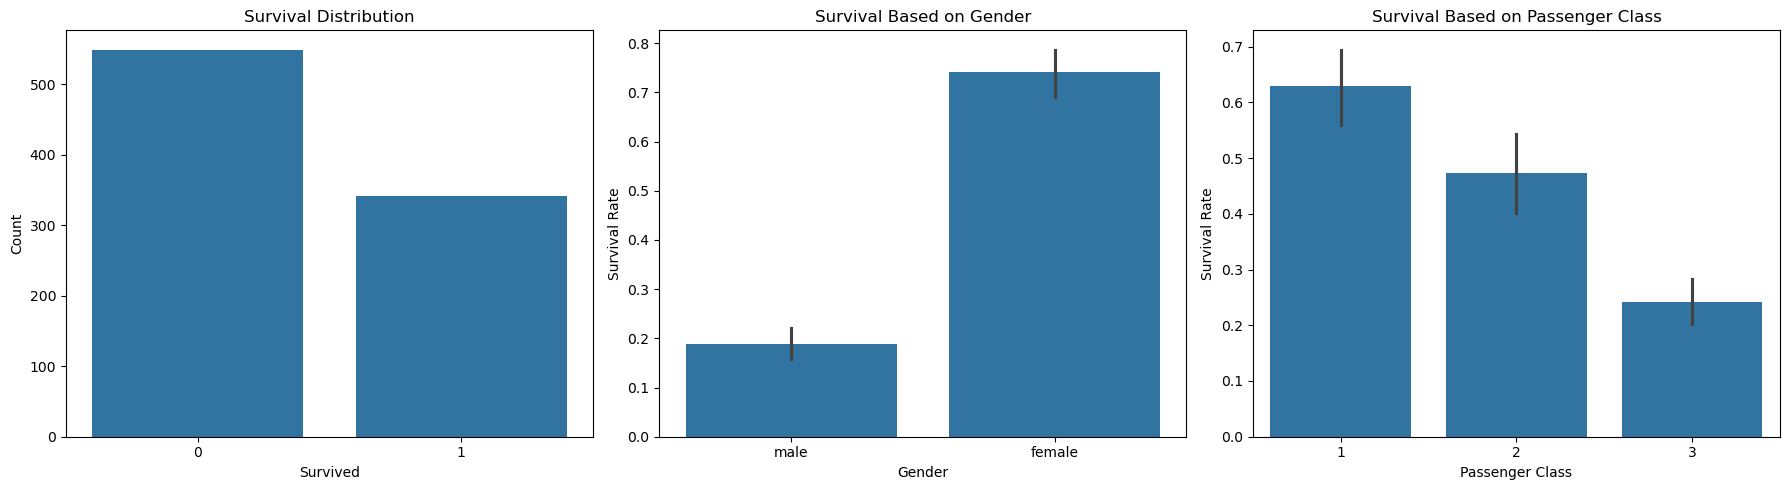

In [320]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

# Visualizing a survival distribution
sns.countplot(x="Survived", data=train_data, ax=axes[0])
axes[0].set_title("Survival Distribution")
axes[0].set_xlabel("Survived")
axes[0].set_ylabel("Count")


# Visualize survival based on gender
sns.barplot(x="Sex", y="Survived", data=train_data, ax=axes[1])
axes[1].set_title("Survival Based on Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Survival Rate")


# Visualize survival based on passenger class
sns.barplot(x="Pclass", y="Survived", data=train_data, ax=axes[2])
axes[2].set_title("Survival Based on Passenger Class")
axes[2].set_xlabel("Passenger Class")
axes[2].set_ylabel("Survival Rate")

plt.tight_layout()
plt.show()

In [321]:
# Filling Missing Values
print(train_data.isnull().sum()) #Checking which columns have missing values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [322]:
if train_data['Age'].notna().sum() > 0:
    train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
else:
    print("Warning: 'Age' column is empty or contains only NaNs.")

print(train_data.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [323]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
print(train_data.isnull().sum())
train_data['Embarked']

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [324]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
print(train_data.isnull().sum())

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin         687
Embarked_Q      0
Embarked_S      0
dtype: int64


In [325]:
# Cabin column still ar large, it appears we cannot drop it from the prediction because it is significant
print(train_data[['Cabin', 'Survived']].groupby(train_data['Cabin'].notnull())['Survived'].mean())

# New column to retain information will keeping dataset simple
train_data['HasCabin'] = train_data['Cabin'].notnull().astype(int)
train_data = train_data.drop('Cabin', axis=1)  # Drop the original Cabin column

print(train_data.isnull().sum())

Cabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
HasCabin      0
dtype: int64


In [332]:
# After preprocessing dataset, we move on to building a ML Model to Predict Survival
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [333]:
print(train_data.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'HasCabin'],
      dtype='object')


In [336]:
# Splitting Data into Features (Input Variables) and Target (Output Variable)
# Independent variables - Features
X = train_data.drop(['Survived'],axis=1)
# Dependent variables - Target
y = train_data['Survived'] 

In [338]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,HasCabin
0,3,0,22.0,1,0,7.2500,False,True,0
1,1,1,38.0,1,0,71.2833,False,False,1
2,3,1,26.0,0,0,7.9250,False,True,0
3,1,1,35.0,1,0,53.1000,False,True,1
4,3,0,35.0,0,0,8.0500,False,True,0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,False,True,0
887,1,1,19.0,0,0,30.0000,False,True,1
888,3,1,28.0,1,2,23.4500,False,True,0
889,1,0,26.0,0,0,30.0000,False,False,1


In [340]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [342]:
# Splitting into training and test sets using sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
# test_size=0.2 means dataset split train-test is 80-20
# random_state=42, random split, putting an integer ensure the split is the same every time the code is run

In [344]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # to ensure no feature dominates due to its huge range
X_test_scaled = scaler.transform(X_test)

In [346]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, solver='saga')

In [348]:
# Evaluating the model
# Accuracy
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8212290502793296


In [350]:
# Confusion matrix
# [[TN, FP]
#  [FN, TP]]
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# TN: correct predictions of deaths (Negatives) and TP: survivers (Positives)
# FN: survived but failed to predict, FP: died but predicted as survived

Confusion Matrix:
[[91 14]
 [18 56]]


In [352]:
# Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
# Simplest method, for 82% accuracy

In [354]:
# Precision: 
# The percentage of correct predictions for each class:
# Class 0 (Not Survived): 83% of the predicted "Not Survived" passengers were correct.
# Class 1 (Survived): 80% of the predicted "Survived" passengers were correct. Recall: 
# The percentage of actual class instances that were correctly identified:
# Class 0 (Not Survived): 87% of the actual "Not Survived" passengers were identified correctly.
# Class 1 (Survived): 76% of the actual "Survived" passengers were identified correctly.
# F1-Score: The balance between precision and recall:
# Class 0 (Not Survived): 85% Class 1 (Survived): 78% Overall Accuracy: 82% of all predictions were correct.
# Analysis Precision vs Recall: The model has a higher recall for class 0 (not survived) compared to class 1 (survived), meaning it’s better at identifying passengers who didn't survive but misses some of the passengers who did survive (lower recall for class 1).
# F1-Score: Your model's F1-Score is fairly balanced between the two classes, indicating that it does a decent job at both precision and recall.

In [ ]:
# still need to understand the data